In [ ]:
! pip install imblearn

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [2]:
test = pd.read_csv("data/bank_data_test.csv")
train = pd.read_csv("data/bank_data_train.csv")

https://www.youtube.com/watch?v=_MjMNr-SSFc

## 0. Data overview

In [8]:
test.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,400980,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,525062,0,0.059381,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,1.0,0.5,0.5,0.0,0.0,0.5,0.5,0.5,NaN
2,280316,0,0.070430,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,496066,0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,375031,0,0.180961,0.0,77.0,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [12]:
test.describe()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
count,88798.000000,88798.000000,79198.000000,38520.0,15332.000000,38520.0,38520.0,88798.000000,19282.000000,19282.000000,...,88798.000000,23817.000000,23281.000000,24452.000000,23817.000000,88798.000000,23281.000000,23281.000000,23281.000000,0.0
mean,368993.799601,0.105948,0.044540,0.0,51.234151,0.0,0.0,0.001395,0.417814,0.415055,...,0.007159,0.053328,0.025664,0.050934,0.009531,0.004479,0.013860,0.013860,0.013860,NaN
std,128247.549453,0.433893,0.110796,0.0,21.545330,0.0,0.0,0.030099,0.315638,0.337138,...,0.065267,0.212901,0.114417,0.187097,0.094423,0.061463,0.096474,0.096474,0.096474,NaN
min,146849.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.010204,0.000169,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,257792.000000,0.000000,0.000000,0.0,34.000000,0.0,0.0,0.000000,0.166667,0.141839,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,369065.500000,0.000000,0.000000,0.0,54.000000,0.0,0.0,0.000000,0.300000,0.288088,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,480225.000000,0.000000,0.037049,0.0,72.000000,0.0,0.0,0.000000,0.571429,0.655653,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,590827.000000,11.000000,1.000000,0.0,89.000000,0.0,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [23]:
test.isnull().sum()

ID                              0
CR_PROD_CNT_IL                  0
AMOUNT_RUB_CLO_PRC           9600
PRC_ACCEPTS_A_EMAIL_LINK    50278
APP_REGISTR_RGN_CODE        73466
                            ...  
TURNOVER_DYNAMIC_CC_3M          0
LDEAL_ACT_DAYS_PCT_TR       65517
LDEAL_ACT_DAYS_PCT_TR4      65517
LDEAL_ACT_DAYS_PCT_CURR     65517
TARGET                      88798
Length: 116, dtype: int64

too many NULLs

In [23]:
train['TARGET'].value_counts()

0    326265
1     28925
Name: TARGET, dtype: int64

classes are imbalanced

## 1. Data preparation

In [39]:
train['train'] = 1
test['train'] = 0
df = pd.concat([train, test], ignore_index=True)
df_b = df.copy()
df.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET,train
0,146841,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1
1,146842,0,0.041033,NaN,NaN,NaN,NaN,0.0,0.166667,0.186107,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1
2,146843,0,0.006915,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1
3,146844,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1
4,146845,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1


In [28]:
df.dtypes.value_counts()

float64    95
object     13
int64       8
dtype: int64

In [40]:
# optimize memory by type casting
def optimize_memory(df):
    before, after = 0, 0
    for i in df.columns:
        before = before + df[i].memory_usage()
        if (df[i].dtype == 'float64'):
            df[i] = df[i].astype('float16')
        if (df[i].dtype == 'int64'):
            df[i] = df[i].astype('int16')
        after = after + df[i].memory_usage()

    before, after = before / 1024**2, after / 1024**2
    print("Before:\t{:.2f} Mb\nAfter:\t{:.2f} Mb".format(before, after))
    return df

df = optimize_memory(df)

Before:	396.34 Mb
After:	132.12 Mb


In [105]:
df.select_dtypes(include =['object']).isnull().sum()

CLNT_TRUST_RELATION            357070
APP_MARITAL_STATUS             358546
APP_KIND_OF_PROP_HABITATION    369645
CLNT_JOB_POSITION_TYPE         387905
CLNT_JOB_POSITION              180325
APP_DRIVING_LICENSE            372211
APP_EDUCATION                  358696
APP_TRAVEL_PASS                372211
APP_CAR                        372212
APP_POSITION_TYPE              368188
APP_EMP_TYPE                   359625
APP_COMP_TYPE                  359625
PACK                                0
dtype: int64

In [41]:
# exclude varaibles with too much missings
for i in df.columns:
    if df[i].isnull().sum() > 100000:
        df.drop(i, axis=1, inplace=True)

In [42]:
# exclude all object types, now we have df only with number types
df = pd.concat([df, pd.get_dummies(df['PACK'])], axis = 1)
df.drop(['PACK'], axis=1, inplace=True)
df.dtypes.value_counts()

float16    35
uint8      12
int16       9
dtype: int64

<AxesSubplot:>

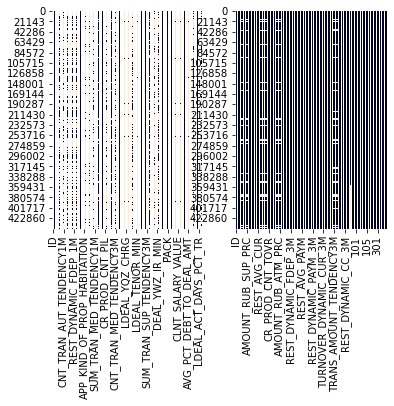

<Figure size 1080x432 with 0 Axes>

In [43]:
# comparison of heatmaps to see number of omissions
fig, axs = plt.subplots(ncols=2)
figure(figsize=(15, 6)) # change sides of plot
sns.heatmap(df_b.isnull(), cbar=False, ax=axs[0])
sns.heatmap(df.isnull(), cbar=False, ax=axs[1])

In [44]:
# divide train and test
df_train = df[df['train']==1].copy() # could be done with target
df_test = df[df['train']==0].copy()

In [52]:
df_test['TARGET']

355190   NaN
355191   NaN
355192   NaN
355193   NaN
355194   NaN
          ..
443983   NaN
443984   NaN
443985   NaN
443986   NaN
443987   NaN
Name: TARGET, Length: 88798, dtype: float16

In [9]:
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc


## 2. Models

### 2.1. Baseline naive classifier

### 2.2. Random forest

### 2.3. Scikit-learn

### 2.4. Keras

### 2.5. TensorFlow

### 2.6. NumPy

## 3. Results